In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns


In [2]:
df = pd.read_csv("/kaggle/input/reddit-perspective/comments_scores.csv")

/tmp/ipykernel_33/2330801559.py:1: DtypeWarning: Columns (6,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/reddit-perspective/comments_scores.csv")


In [3]:
df

,id,body,subreddit,to_type,NEL,Names,created_utc,sex,ethnicity,origin,...,Relation,Valence,Arousal,Dominance,insult,profanity,threat,severe_toxicity,identity_attack,toxicity
0,e2r5x8o,"Paul Joseph Watson, Count Dankula and more ha...",The_Donald,t1,Q291169,['Jeremy Corbyn'],NaN,male,NaN,United Kingdom,...,['nmod'],0.570419,0.425279,0.563581,0.052034,0.022082,0.007068,0.001774,0.010211,0.100891
1,e2r5x9y,Just wait til [NAME] releases [NAME] tapes! .....,politics,t1,Q7747,['Putin'],NaN,male,Russians,Russia,...,"['nmod', 'npadvmod']",0.569800,0.381400,0.425200,0.009470,0.020374,0.010318,0.002270,0.005846,0.026617
2,e2r5zwt,"I want Michael Avenatti to live a long time, a...",politics,t1,Q22686,['Donald Trump'],NaN,male,NaN,United States of America,...,['dep'],0.600769,0.472000,0.527231,0.367985,0.106733,0.138155,0.016125,0.016762,0.396957
3,e2r640r,I think we've established [NAME]'s 'type'...ty...,politics,t3,Q22686,['Trump'],NaN,male,NaN,United States of America,...,['dobj'],0.669714,0.372143,0.507857,0.204347,0.103639,0.009282,0.009384,0.076738,0.285487
4,e2r66h0,There's no way [NAME] or Trump know exactly wh...,politics,t3,Q212648,['Giuliani'],NaN,male,NaN,United States of America,...,"['parataxis', 'dep']",0.549697,0.484636,0.545667,0.448025,0.421027,0.044926,0.023077,0.113961,0.440214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137551,fah1q9z,Reminds me of Spiro Agnew a little bit. Spiro ...,neoliberal,t3,Q9588,['Nixon'],NaN,male,NaN,United States of America,...,"['dep', 'pobj']",0.150183,0.120585,0.151841,0.092704,0.038405,0.033041,0.007591,0.279916,0.246033
137552,fah1wk9,How would Warren’s plan to get the most vulner...,politics,t1,Q359442,['Bernie'],NaN,male,Jewish people,United States of America,...,"['npadvmod', 'appos', 'dobj']",0.233210,0.193880,0.240870,0.018710,0.024609,0.008428,0.002184,0.003145,0.048595
137553,fah2hvs,This’s [NAME],news,t1,Q7791016,['Barrack'],NaN,male,NaN,United States of America,...,['appos'],0.114600,0.060000,0.083000,0.009793,0.020100,0.008997,0.001860,0.006216,0.022728
137554,fah2lbq,Mid year exam (the [NAME] email investigation)...,The_Donald,t3,Q6294,['Hillary'],NaN,female,NaN,United States of America,...,['nmod'],0.237357,0.170286,0.217071,0.007019,0.010707,0.006285,0.000536,0.001804,0.008231


In [4]:
df.iloc[1]["body"]

'Just wait til [NAME] releases [NAME] tapes! ...probably via Emin music video.'

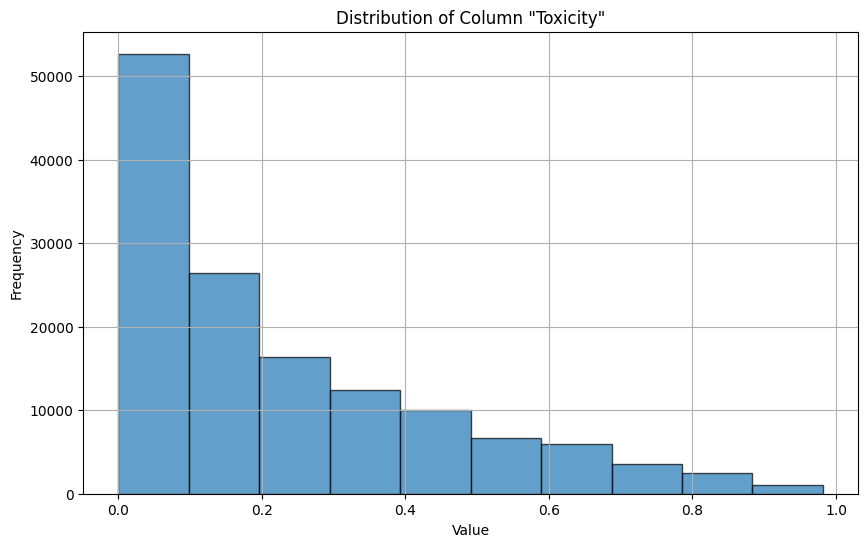

In [5]:
# Plotting the distribution of column 'a'
plt.figure(figsize=(10, 6))
plt.hist(df['toxicity'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Distribution of Column "Toxicity"')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

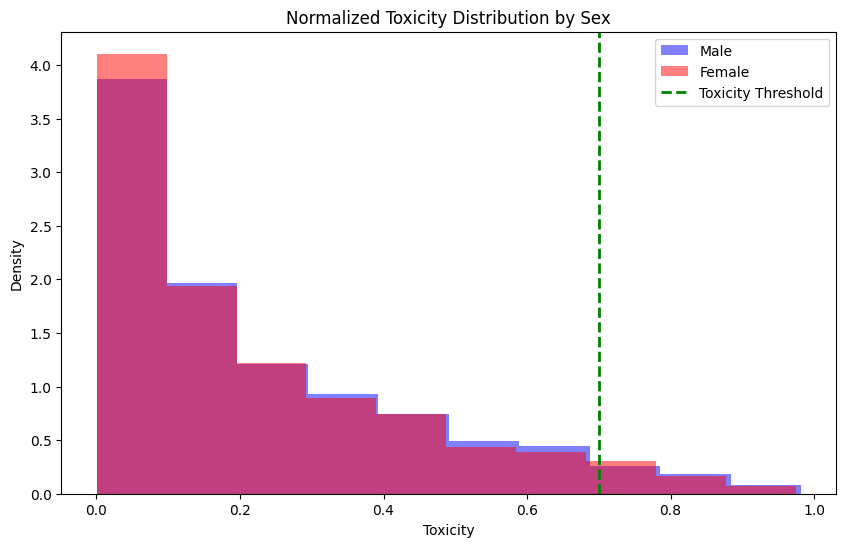

In [6]:
# Splitting the data into two groups based on 'sex'
male_toxicity = df[df['sex'] == 'male']['toxicity']
female_toxicity = df[df['sex'] == 'female']['toxicity']

plt.figure(figsize=(10, 6))

plt.hist(male_toxicity, bins=10, alpha=0.5, label='Male', color='blue', density=True)
plt.hist(female_toxicity, bins=10, alpha=0.5, label='Female', color='red', density=True)

# Adding the threshold line at 0.7
plt.axvline(x=0.7, color='green', linestyle='--', linewidth=2, label='Toxicity Threshold')

plt.xlabel('Toxicity')
plt.ylabel('Density')
plt.title('Normalized Toxicity Distribution by Sex')
plt.legend(loc='upper right')

plt.show()

In [7]:
# Log normalize the toxicity scores, adding a small constant to avoid log(0)
df['log_toxicity'] = np.log(df['toxicity'] + 1e-9)

# Separate the log-normalized scores by sex
male_log_toxicity = df[df['sex'] == 'male']['log_toxicity'].dropna()
female_log_toxicity = df[df['sex'] == 'female']['log_toxicity'].dropna()

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(male_log_toxicity, female_log_toxicity)

# Display the t-test results
print(f"T-statistic: {t_stat}, P-value: {p_value}")



T-statistic: 7.051022563645225, P-value: 1.7843922608086512e-12


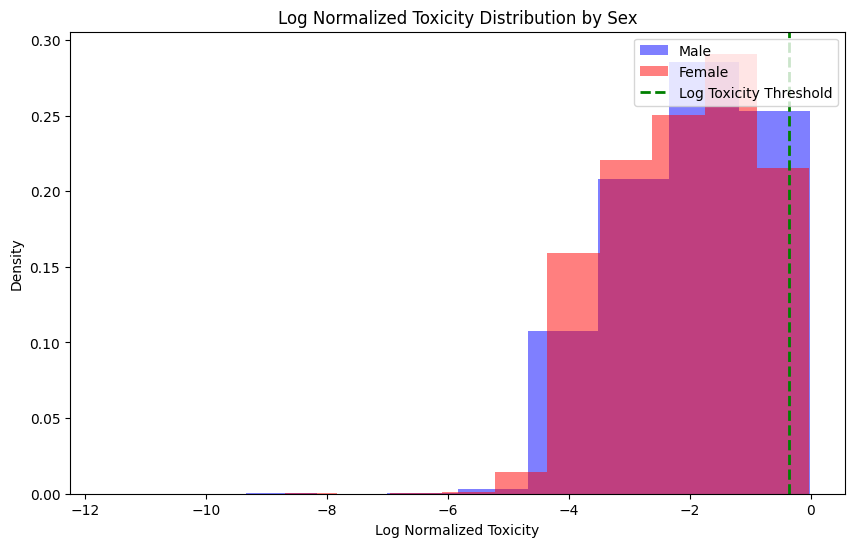

In [8]:
# Plotting the histograms of log-normalized toxicity scores with the threshold line at log(0.7)
plt.figure(figsize=(10, 6))

plt.hist(male_log_toxicity, bins=10, alpha=0.5, label='Male', color='blue', density=True)
plt.hist(female_log_toxicity, bins=10, alpha=0.5, label='Female', color='red', density=True)

# Adding the threshold line at log(0.7)
threshold = np.log(0.7 + 1e-9)
plt.axvline(x=threshold, color='green', linestyle='--', linewidth=2, label='Log Toxicity Threshold')

plt.xlabel('Log Normalized Toxicity')
plt.ylabel('Density')
plt.title('Log Normalized Toxicity Distribution by Sex')
plt.legend(loc='upper right')

plt.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Non-log transformed toxicity scores
male_toxicity = df[df['sex'] == 'male']['toxicity'].dropna()
female_toxicity = df[df['sex'] == 'female']['toxicity'].dropna()

# Calculate the means of the non-log transformed toxicity scores for males and females
mean_male_toxicity = male_toxicity.mean()
mean_female_toxicity = female_toxicity.mean()

# Bootstrap confidence intervals for each group
def bootstrap_confidence_interval(data, n_iterations=10000):
    bootstrapped_means = []
    for _ in range(n_iterations):
        resampled_data = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_means.append(resampled_data.mean())
    return np.percentile(bootstrapped_means, [2.5, 97.5])

ci_male = bootstrap_confidence_interval(male_toxicity)
ci_female = bootstrap_confidence_interval(female_toxicity)

# Bootstrap the difference in means
def bootstrap_mean_difference(data1, data2, n_iterations=10000):
    bootstrapped_differences = []
    n1, n2 = len(data1), len(data2)

    for _ in range(n_iterations):
        resampled_data1 = np.random.choice(data1, size=n1, replace=True)
        resampled_data2 = np.random.choice(data2, size=n2, replace=True)
        bootstrapped_differences.append(resampled_data2.mean() - resampled_data1.mean())
    
    return np.percentile(bootstrapped_differences, [2.5, 97.5]), np.mean(bootstrapped_differences)

# Perform bootstrap for the difference in means
confidence_interval_diff, bootstrap_mean_diff = bootstrap_mean_difference(male_toxicity.values, female_toxicity.values)


# Means and confidence intervals
means = [mean_male_toxicity, mean_female_toxicity]
ci_low = [mean_male_toxicity - ci_male[0], mean_female_toxicity - ci_female[0]]
ci_high = [ci_male[1] - mean_male_toxicity, ci_female[1] - mean_female_toxicity]


# Print the results with text
print(f"Mean toxicity score for males: {mean_male_toxicity:.2f}")
print(f"95% Confidence Interval for males: [{ci_male[0]:.2f}, {ci_male[1]:.2f}]")

print(f"Mean toxicity score for females: {mean_female_toxicity:.2f}")
print(f"95% Confidence Interval for females: [{ci_female[0]:.2f}, {ci_female[1]:.2f}]")

print(f"Mean difference in toxicity scores (female - male): {bootstrap_mean_diff:.2f}")
print(f"95% Confidence Interval for the mean difference: [{confidence_interval_diff[0]:.2f}, {confidence_interval_diff[1]:.2f}]")



Mean toxicity score for males: 0.23
95% Confidence Interval for males: [0.23, 0.23]
Mean toxicity score for females: 0.22
95% Confidence Interval for females: [0.22, 0.22]
Mean difference in toxicity scores (female - male): -0.01
95% Confidence Interval for the mean difference: [-0.01, -0.01]


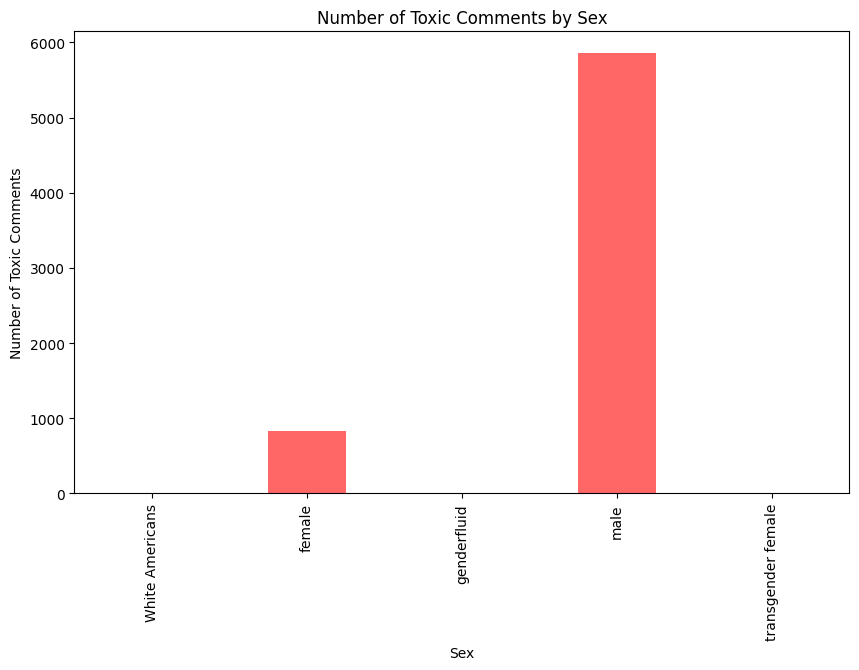

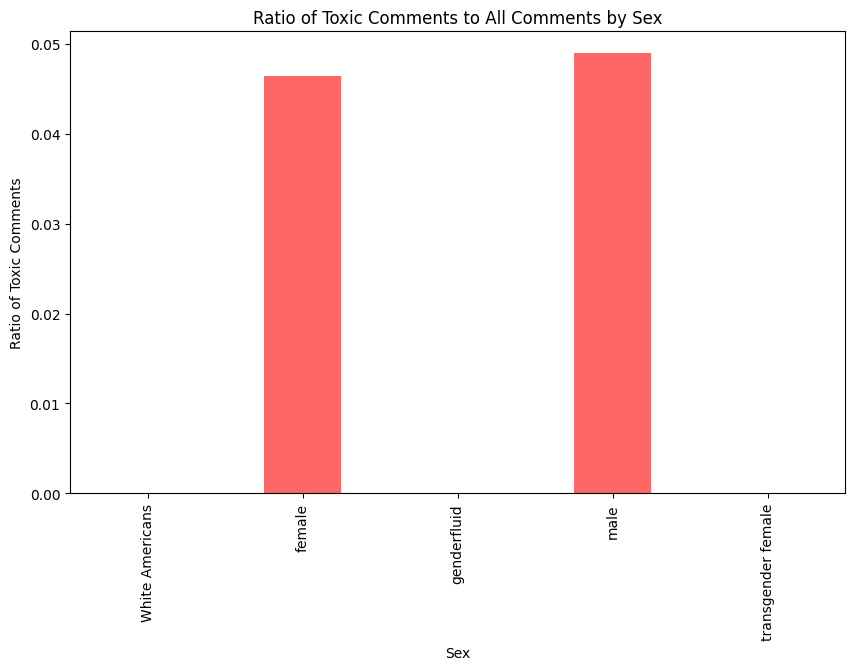

In [13]:
threshold = 0.7
df['is_toxic'] = df['toxicity'] > threshold

# Count the number of toxic comments per group
toxic_counts = df.groupby('sex')['is_toxic'].sum()
total_counts = df.groupby('sex')['is_toxic'].count()

# Calculate the ratio of toxic comments to all comments in each group
ratio_toxic = toxic_counts / total_counts

# Plot the counts of toxic comments per group
plt.figure(figsize=(10, 6))
toxic_counts.plot(kind='bar', color=['blue', 'red'], alpha=0.6)
plt.xlabel('Sex')
plt.ylabel('Number of Toxic Comments')
plt.title('Number of Toxic Comments by Sex')
plt.show()

# Plot the ratio of toxic comments to all comments in each group
plt.figure(figsize=(10, 6))
ratio_toxic.plot(kind='bar', color=['blue', 'red'], alpha=0.6)
plt.xlabel('Sex')
plt.ylabel('Ratio of Toxic Comments')
plt.title('Ratio of Toxic Comments to All Comments by Sex')
plt.show()

In [15]:
df[df['toxicity'] > threshold]

,id,body,subreddit,to_type,NEL,Names,created_utc,sex,ethnicity,origin,...,Arousal,Dominance,insult,profanity,threat,severe_toxicity,identity_attack,toxicity,log_toxicity,is_toxic
41,e2taydy,Keep letting perfection be the enemy of good. ...,politics,t1,Q22686,['Trump'],NaN,male,NaN,United States of America,...,0.522925,0.561850,0.651296,0.844891,0.082431,0.447873,0.276629,0.853334,-0.158604,True
64,e1scupa,Breaking news: [NAME] remains full of shit. Mo...,politics,t3,Q212648,['Guiliani'],NaN,male,NaN,United States of America,...,0.410600,0.517600,0.496273,0.767348,0.018365,0.169603,0.091628,0.788558,-0.237549,True
65,e1sdcqq,"I try my best to empathize with everyone, even...",politics,t1,Q7437083,['Pruitt'],NaN,male,NaN,United States of America,...,0.476000,0.539750,0.679858,0.880201,0.519571,0.458954,0.228595,0.862967,-0.147379,True
98,e2y5prv,not to mention shit like this that just droppe...,politics,t3,Q463557,['Rand Paul'],NaN,male,NaN,United States of America,...,0.513931,0.622352,0.489133,0.652821,0.079364,0.350942,0.490746,0.725297,-0.321174,True
102,e2y7c6t,Alex Jones may be a bigger “fucking moron” tha...,politics,t3,Q22686,['Donald'],NaN,male,NaN,United States of America,...,0.442400,0.357400,0.839438,0.890795,0.011742,0.458954,0.180029,0.924899,-0.078070,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137414,faljimu,FUCK YES THANK YOU[NAME] + corruption is the s...,politics,t3,Q22686,['Trump'],NaN,male,NaN,United States of America,...,0.134833,0.118111,0.434504,0.839747,0.037185,0.451856,0.097418,0.854047,-0.157769,True
137422,fclg700,"Fuck you, folks who are homeless aren't a talk...",politics,t3,Q22686,['Trump'],NaN,male,NaN,United States of America,...,0.114367,0.088490,0.729812,0.934264,0.064969,0.507037,0.550447,0.960691,-0.040102,True
137468,fbcxyoc,How does anyone believe the narrative that [NA...,politics,t1,Q22686,['Trump'],NaN,male,NaN,United States of America,...,0.142300,0.143950,0.785655,0.495769,0.009049,0.024115,0.064768,0.820483,-0.197863,True
137516,f9njuja,"[NAME]: ""I watched Hannity, Laura Ingraham, an...",politics,t3,Q22686,['Trump'],NaN,male,NaN,United States of America,...,0.121583,0.124167,0.711202,0.808958,0.011612,0.351302,0.091628,0.851736,-0.160479,True


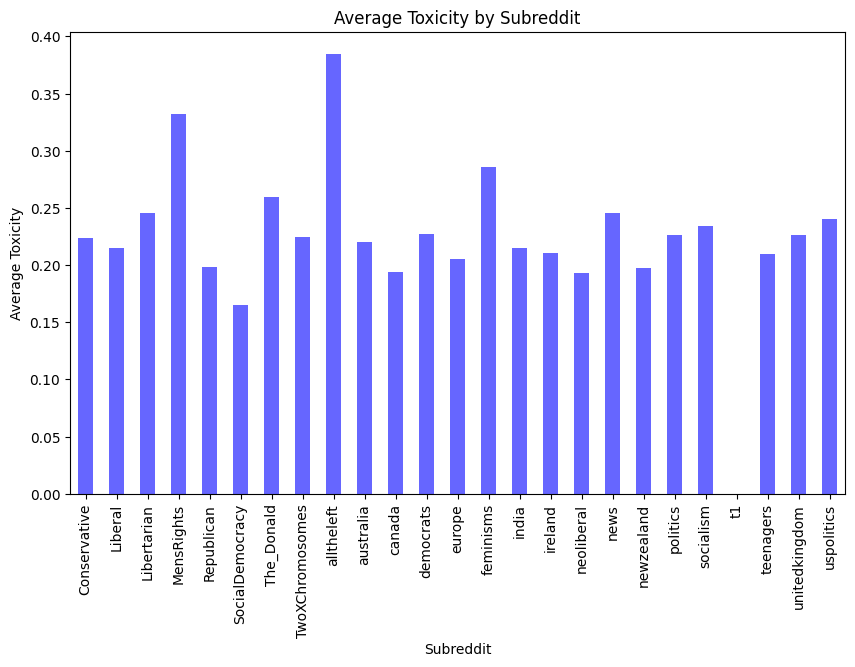

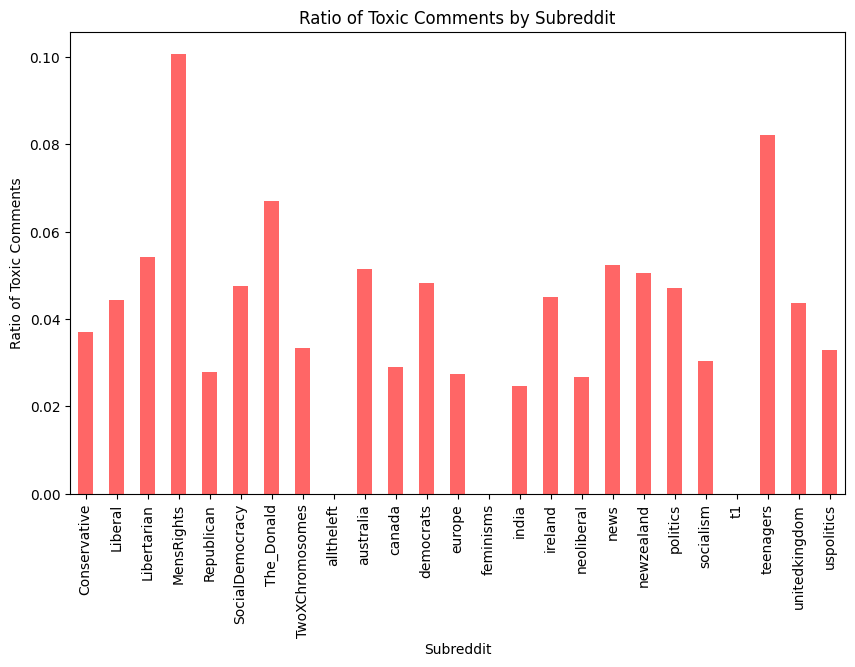

,avg_toxicity,toxic_count,total_count,toxic_ratio
subreddit,,,,
Conservative,0.223620,75,2021,0.037110
Liberal,0.214883,4,90,0.044444
Libertarian,0.245704,113,2088,0.054119
MensRights,0.332158,14,139,0.100719
Republican,0.198663,4,144,0.027778
SocialDemocracy,0.165206,1,21,0.047619
The_Donald,0.259516,1117,16690,0.066926
TwoXChromosomes,0.224859,5,150,0.033333
alltheleft,0.384721,0,4,0.000000


In [20]:
# Add a column to indicate if a comment is toxic based on the threshold of 0.7
df['is_toxic'] = df['toxicity'] > 0.7

# Calculate average toxicity and ratio of toxic comments across subreddits
subreddit_stats = df.groupby('subreddit').agg(
    avg_toxicity=('toxicity', 'mean'),
    toxic_count=('is_toxic', 'sum'),
    total_count=('id', 'count')
)

subreddit_stats['toxic_ratio'] = subreddit_stats['toxic_count'] / subreddit_stats['total_count']

# Plot average toxicity across subreddits
plt.figure(figsize=(10, 6))
subreddit_stats['avg_toxicity'].plot(kind='bar', color='blue', alpha=0.6)
plt.xlabel('Subreddit')
plt.ylabel('Average Toxicity')
plt.title('Average Toxicity by Subreddit')
plt.show()

# Plot ratio of toxic comments across subreddits
plt.figure(figsize=(10, 6))
subreddit_stats['toxic_ratio'].plot(kind='bar', color='red', alpha=0.6)
plt.xlabel('Subreddit')
plt.ylabel('Ratio of Toxic Comments')
plt.title('Ratio of Toxic Comments by Subreddit')
plt.show()

# Display the stats
subreddit_stats

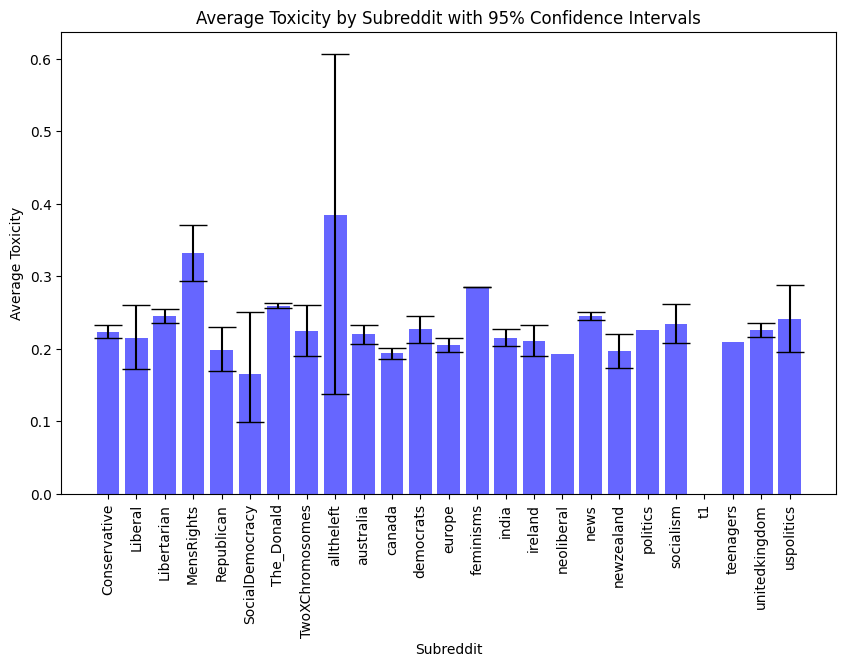

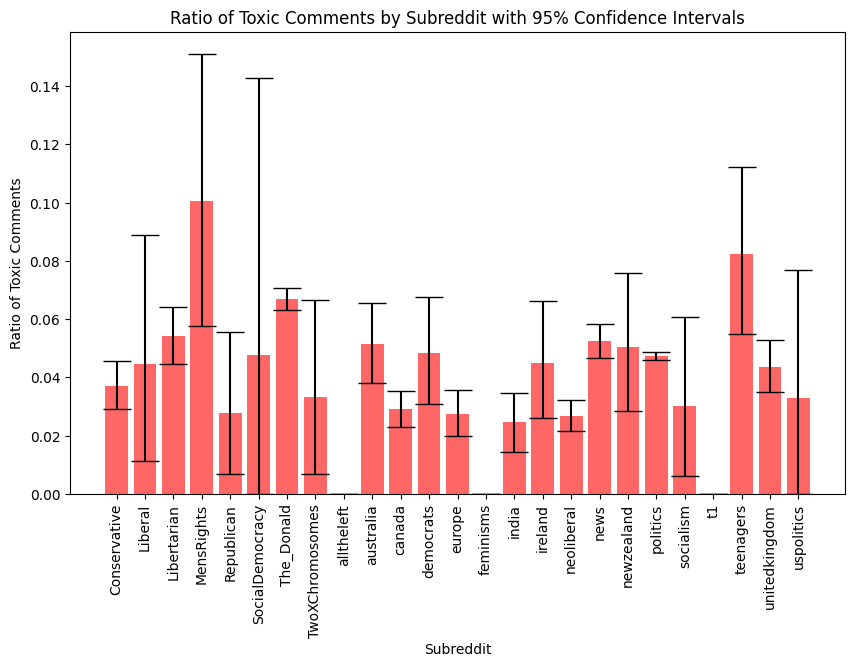

,avg_toxicity,toxic_count,total_count,toxic_ratio,avg_toxicity_ci_low,avg_toxicity_ci_high,toxic_ratio_ci_low,toxic_ratio_ci_high
subreddit,,,,,,,,
Conservative,0.223620,75,2021,0.037110,0.214495,0.232603,0.029193,0.045522
Liberal,0.214883,4,90,0.044444,0.172324,0.260981,0.011111,0.088889
Libertarian,0.245704,113,2088,0.054119,0.236222,0.255457,0.044540,0.064176
MensRights,0.332158,14,139,0.100719,0.293332,0.370595,0.057554,0.151079
Republican,0.198663,4,144,0.027778,0.169431,0.229675,0.006944,0.055556
SocialDemocracy,0.165206,1,21,0.047619,0.098997,0.250187,0.000000,0.142857
The_Donald,0.259516,1117,16690,0.066926,0.255924,0.263046,0.063092,0.070761
TwoXChromosomes,0.224859,5,150,0.033333,0.190813,0.260156,0.006667,0.066667
alltheleft,0.384721,0,4,0.000000,0.138218,0.606942,0.000000,0.000000


In [23]:
# Function to calculate bootstrap confidence intervals for means
def bootstrap_ci_mean(data, n_iterations=10000):
    bootstrapped_means = []
    for _ in range(n_iterations):
        resampled_data = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_means.append(resampled_data.mean())
    return np.percentile(bootstrapped_means, [2.5, 97.5])

# Calculate bootstrap confidence intervals for average toxicity by subreddit
subreddit_stats['avg_toxicity_ci_low'] = subreddit_stats.apply(
    lambda row: bootstrap_ci_mean(df[df['subreddit'] == row.name]['toxicity'])[0], axis=1)
subreddit_stats['avg_toxicity_ci_high'] = subreddit_stats.apply(
    lambda row: bootstrap_ci_mean(df[df['subreddit'] == row.name]['toxicity'])[1], axis=1)

# Calculate bootstrap confidence intervals for toxic ratio by subreddit
subreddit_stats['toxic_ratio_ci_low'] = subreddit_stats.apply(
    lambda row: bootstrap_ci_mean(df[df['subreddit'] == row.name]['is_toxic'].astype(float))[0], axis=1)
subreddit_stats['toxic_ratio_ci_high'] = subreddit_stats.apply(
    lambda row: bootstrap_ci_mean(df[df['subreddit'] == row.name]['is_toxic'].astype(float))[1], axis=1)


# Plot average toxicity across subreddits with confidence intervals (vertical x labels)
plt.figure(figsize=(10, 6))
plt.bar(subreddit_stats.index, subreddit_stats['avg_toxicity'], 
        yerr=[subreddit_stats['avg_toxicity'] - subreddit_stats['avg_toxicity_ci_low'], 
              subreddit_stats['avg_toxicity_ci_high'] - subreddit_stats['avg_toxicity']], 
        capsize=10, color='blue', alpha=0.6)
plt.xlabel('Subreddit')
plt.ylabel('Average Toxicity')
plt.title('Average Toxicity by Subreddit with 95% Confidence Intervals')
plt.xticks(rotation=90)
plt.show()

# Plot ratio of toxic comments across subreddits with confidence intervals (vertical x labels)
plt.figure(figsize=(10, 6))
plt.bar(subreddit_stats.index, subreddit_stats['toxic_ratio'], 
        yerr=[subreddit_stats['toxic_ratio'] - subreddit_stats['toxic_ratio_ci_low'], 
              subreddit_stats['toxic_ratio_ci_high'] - subreddit_stats['toxic_ratio']], 
        capsize=10, color='red', alpha=0.6)
plt.xlabel('Subreddit')
plt.ylabel('Ratio of Toxic Comments')
plt.title('Ratio of Toxic Comments by Subreddit with 95% Confidence Intervals')
plt.xticks(rotation=90)
plt.show()


# Display the updated stats with confidence intervals
subreddit_stats


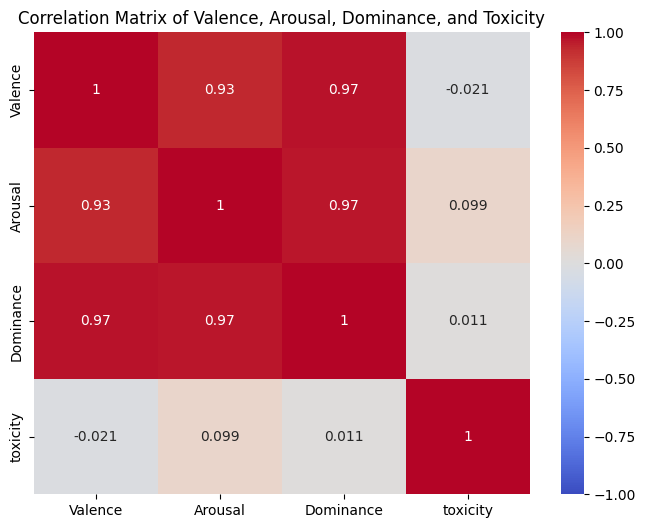

In [19]:
# Select only the relevant columns for correlation
selected_columns = ['Valence', 'Arousal', 'Dominance', 'toxicity']
selected_df = df[selected_columns]

# Calculate the correlation matrix
corr_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Valence, Arousal, Dominance, and Toxicity')
plt.show()